<a href="https://colab.research.google.com/github/head1ton/kaggle_dev/blob/master/A_Data_Science_Framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A Data Science Framework

1. Define the Problem
2. Gather the Data
3. Prepare Data for Consumption
4. Perform Exploratory Analysis
5. Model Data
6. Validate and Implement Data Model
7. Optimize and Strategize

In [0]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("Numpy version: {}".format(np.__version__))
import scipy as sp
print("Scipy version: {}".format(sp.__version__))
import IPython
from IPython import display
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

import random
import time
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

from subprocess import check_output
print(check_output(["ls", "./"]).decode("utf8"))

Python version: 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
pandas version: 0.25.3
matplotlib version: 3.1.2
Numpy version: 1.17.4
Scipy version: 1.3.3
IPython version: 5.5.0
scikit-learn version: 0.21.3
-------------------------
sample_data
test.csv
train.csv
Untitled Folder



In [0]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
# from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12, 8

In [0]:
data_raw = pd.read_csv('./train.csv')
data_val = pd.read_csv('./test.csv')

data1 = data_raw.copy(deep=True)
data_cleaner = [data1, data_val]

print(data_raw.info())
data_raw.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
289,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C
701,702,1,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.5500,NaN,S
520,521,1,1,"Perreault, Miss. Anne",female,30.0,0,0,12749,93.5000,B73,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
864,865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.0000,NaN,S
598,599,0,3,"Boulos, Mr. Hanna",male,NaN,0,0,2664,7.2250,NaN,C


In [0]:
print('Train columns with null values: \n', data1.isnull().sum())
print('-'*10)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print('-'*10)

data_raw.describe(include='all')

Train columns with null values: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values: 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Allum, Mr. Owen George",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


* pandas.DataFrame
* pandas.DataFrame.info
* pandas.DataFrame.describe
* Indexing and Selecting Data
* pandas.isnull
* pandas.DataFrame.sum
* pandas.DataFrame.mode
* pandas.DataFrame.copy
* pandas.DataFrame.fillna
* pandas.DataFrame.drop
* pandas.Series.value_counts
* pandas.DataFrame.loc

In [0]:
data_raw['Embarked'].mode() # mode는 가장 자주 나오는 값

0    S
dtype: object

In [0]:
for dataset in data_cleaner:
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)

drop_column = ['PassengerId', 'Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace=True)

print(data1.isnull().sum())
print('-'*10)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [0]:
data_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [0]:
data1["Name"].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: 0, Length: 891, dtype: object

In [0]:
for dataset in data_cleaner:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

In [0]:
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,Mr,"(-0.001, 7.896]","(30.4, 45.6]"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,0,Mrs,"(-0.001, 7.896]","(45.6, 60.8]"
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,Mr,"(7.896, 14.454]","(60.8, 76.0]"
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,1,Mr,"(7.896, 14.454]","(15.2, 30.4]"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,0,Mrs,"(7.896, 14.454]","(15.2, 30.4]"


In [0]:
data1['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Mme               1
Lady              1
Capt              1
Ms                1
Jonkheer          1
Sir               1
the Countess      1
Don               1
Name: Title, dtype: int64

In [0]:
stat_min = 10.
title_names = (data1['Title'].value_counts() < stat_min)
title_names

Mr              False
Miss            False
Mrs             False
Master          False
Dr               True
Rev              True
Mlle             True
Major            True
Col              True
Mme              True
Lady             True
Capt             True
Ms               True
Jonkheer         True
Sir              True
the Countess     True
Don              True
Name: Title, dtype: bool

In [0]:
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print('-'*10)

data1.info()
data_val.info()
data1.sample(10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
720,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.00,0,1,33.0000,S,2,0,Miss,"(31.0, 512.329]","(-0.08, 16.0]"
78,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,29.0000,S,3,0,Master,"(14.454, 31.0]","(-0.08, 16.0]"
627,1,1,"Longley, Miss. Gretchen Fiske",female,21.00,0,0,77.9583,S,1,1,Miss,"(31.0, 512.329]","(16.0, 32.0]"
440,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45.00,1,1,26.2500,S,3,0,Mrs,"(14.454, 31.0]","(32.0, 48.0]"
785,0,3,"Harmer, Mr. Abraham (David Lishin)",male,25.00,0,0,7.2500,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
832,0,3,"Saad, Mr. Amin",male,28.00,0,0,7.2292,C,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
644,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,19.2583,C,4,0,Miss,"(14.454, 31.0]","(-0.08, 16.0]"
49,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.00,1,0,17.8000,S,2,0,Mrs,"(14.454, 31.0]","(16.0, 32.0]"
403,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.00,1,0,15.8500,S,2,0,Mr,"(14.454, 31.0]","(16.0, 32.0]"
656,0,3,"Radeff, Mr. Alexander",male,28.00,0,0,7.8958,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"


In [0]:
data_val.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,Mr,"(-0.001, 7.896]","(30.4, 45.6]"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,0,Mrs,"(-0.001, 7.896]","(45.6, 60.8]"
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,Mr,"(7.896, 14.454]","(60.8, 76.0]"
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,1,Mr,"(7.896, 14.454]","(15.2, 30.4]"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,0,Mrs,"(7.896, 14.454]","(15.2, 30.4]"


* Categorical Encoding
* Sklearn LabelEncoder
* Sklearn OneHotEncoder
* Pandas Categorical dtype
* pandas.get_dummies

In [0]:
label = LabelEncoder()
for dataset in data_cleaner:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

In [0]:
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,Mr,"(-0.001, 7.896]","(30.4, 45.6]",1,1,5,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,0,Mrs,"(-0.001, 7.896]","(45.6, 60.8]",0,2,6,3,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,Mr,"(7.896, 14.454]","(60.8, 76.0]",1,1,5,4,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,1,Mr,"(7.896, 14.454]","(15.2, 30.4]",1,2,5,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,0,Mrs,"(7.896, 14.454]","(15.2, 30.4]",0,2,6,1,1


In [0]:
data_cleaner[0][:5]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,3,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,0,4,2,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]",0,2,2,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,2,4,2,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]",1,2,3,2,1


In [0]:
data_cleaner[1][:5]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,Mr,"(-0.001, 7.896]","(30.4, 45.6]",1,1,5,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,0,Mrs,"(-0.001, 7.896]","(45.6, 60.8]",0,2,6,3,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,Mr,"(7.896, 14.454]","(60.8, 76.0]",1,1,5,4,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,1,Mr,"(7.896, 14.454]","(15.2, 30.4]",1,2,5,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,0,Mrs,"(7.896, 14.454]","(15.2, 30.4]",0,2,6,1,1


In [0]:
Target = ['Survived']
data1_x = ['Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']
data1_x_calc = ['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'SibSp', 'Parch', 'Age', 'Fare']
data1_xy = Target + data1_x
print('Original X Y: ', data1_xy, '\n')

data1_x_bin = ['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')

data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')

data1_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [0]:
print('Train columns with null values: \n', data1.isnull().sum())
print('-'*10)
print(data1.info())
print('-'*10)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print('-'*10)
print(data_val.info())
print('-'*10)

data_raw.describe(include='all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
IsAlone          891 non-null int64
Title            891 non-null object
FareBin          891 non-null catego

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Allum, Mr. Owen George",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [0]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state=0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target], random_state=0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state=0)

print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


In [0]:
train1_x.head()

,Sex_Code,Pclass,Embarked_Code,Title_Code,SibSp,Parch,Age,Fare
105,1,3,2,3,0,0,28.0,7.8958
68,0,3,2,2,4,2,17.0,7.9250
253,1,3,2,3,1,0,30.0,16.1000
320,1,3,2,3,0,0,22.0,7.2500
706,0,2,2,4,0,0,45.0,13.5000


In [0]:
train1_x_bin.head()

,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


In [0]:
train1_x_dummy.head()

,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
105,3,0,0,28.0,7.8958,1,1,0,1,0,0,1,0,0,0,1,0
68,3,4,2,17.0,7.9250,7,0,1,0,0,0,1,0,0,1,0,0
253,3,1,0,30.0,16.1000,2,0,0,1,0,0,1,0,0,0,1,0
320,3,0,0,22.0,7.2500,1,1,0,1,0,0,1,0,0,0,1,0
706,2,0,0,45.0,13.5000,1,1,1,0,0,0,1,0,0,0,0,1


In [0]:
data1_x

['Sex',
 'Pclass',
 'Embarked',
 'Title',
 'SibSp',
 'Parch',
 'Age',
 'Fare',
 'FamilySize',
 'IsAlone']

In [0]:
Target

['Survived']

In [0]:
for x in data1_x:
    if data1[x].dtype != 'float64':
        print('Survival Correlation by : ', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')

print(pd.crosstab(data1['Title'], data1[Target[0]]))

Survival Correlation by :  Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by :  Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by :  Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by :  Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Survival Correlation by :  SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by :  Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by :  FamilySize
   FamilySize  Survived
0           

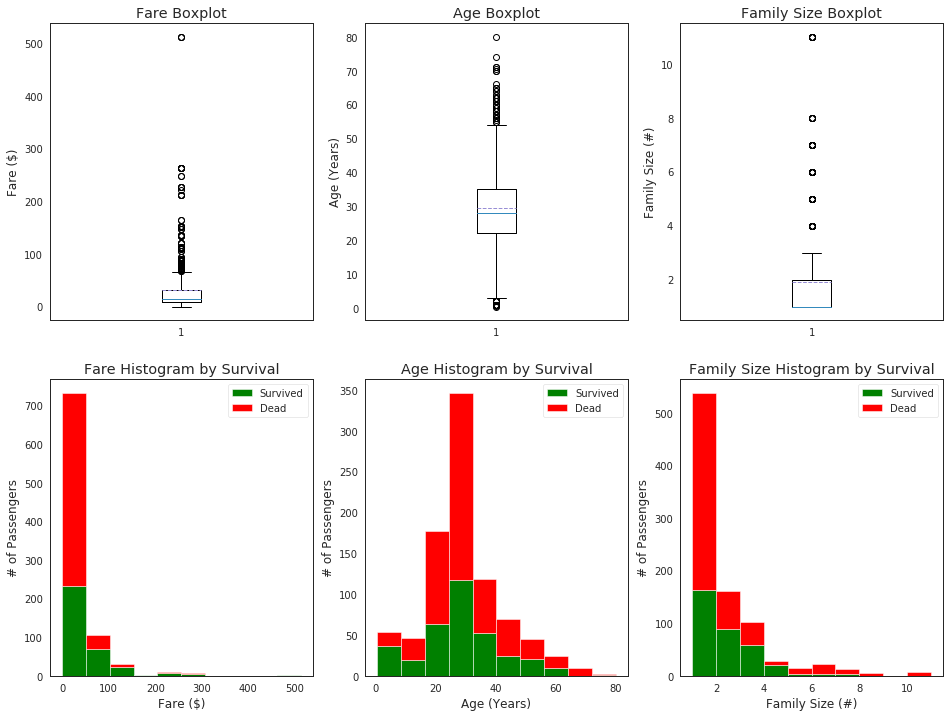

In [0]:
plt.figure(figsize=[16, 12])

plt.subplot(231)
plt.boxplot(x=data1['Fare'], showmeans=True, meanline=True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(data1['Age'], showmeans=True, meanline=True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data1['FamilySize'], showmeans=True, meanline=True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

plt.subplot(234)
plt.hist(x = [data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']], stacked=True, color=['g', 'r'], label=['Survived', 'Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']], stacked=True, color=['g', 'r'], label=['Survived', 'Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x=[data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']], stacked=True, color=['g', 'r'], label=['Survived', 'Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

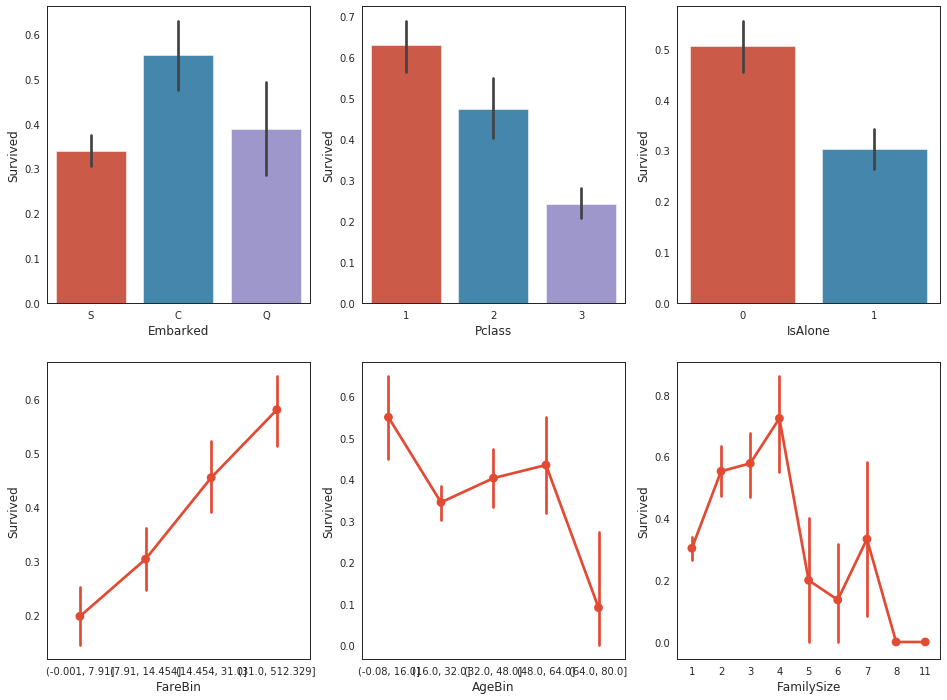

In [0]:
fig, saxis = plt.subplots(2, 3, figsize=(16, 12))

sns.barplot(x='Embarked', y='Survived', data=data1, ax=saxis[0, 0])

sns.barplot(x='Pclass', y='Survived', order=[1,2,3], data=data1, ax=saxis[0, 1])

sns.barplot(x='IsAlone', y='Survived', order=[0,1], data=data1, ax=saxis[0, 2])

sns.pointplot(x='FareBin', y='Survived', data=data1, ax=saxis[1, 0])

sns.pointplot(x='AgeBin', y='Survived', data=data1, ax=saxis[1, 1])

sns.pointplot(x='FamilySize', y='Survived', data=data1, ax=saxis[1, 2])

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

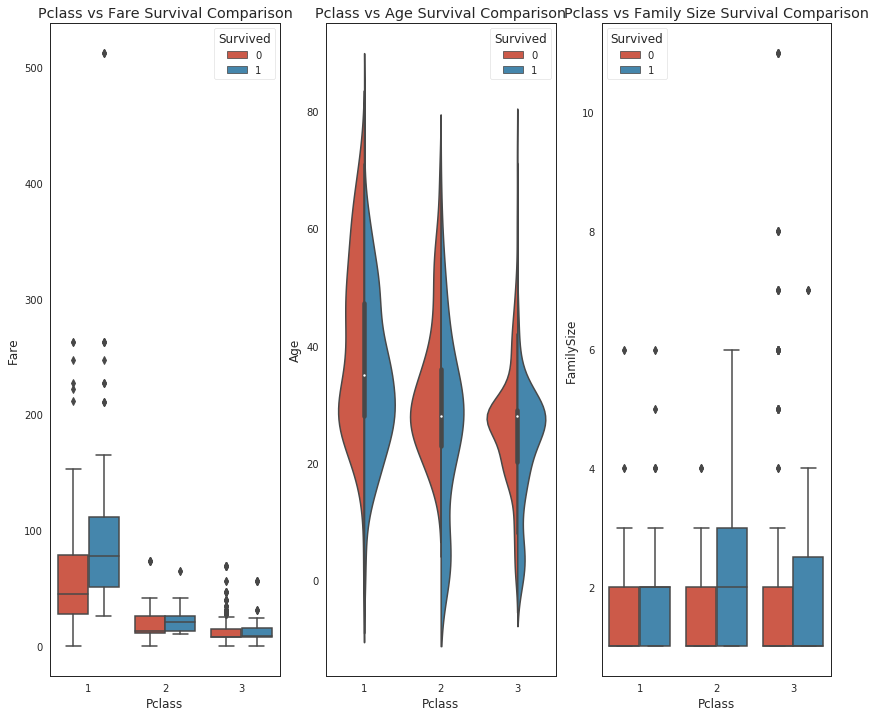

In [0]:
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(14, 12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data1, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data1, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y = 'FamilySize', hue = 'Survived', data = data1, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

Text(0.5, 1, 'Sex vs IsAlone Survival Comparison')

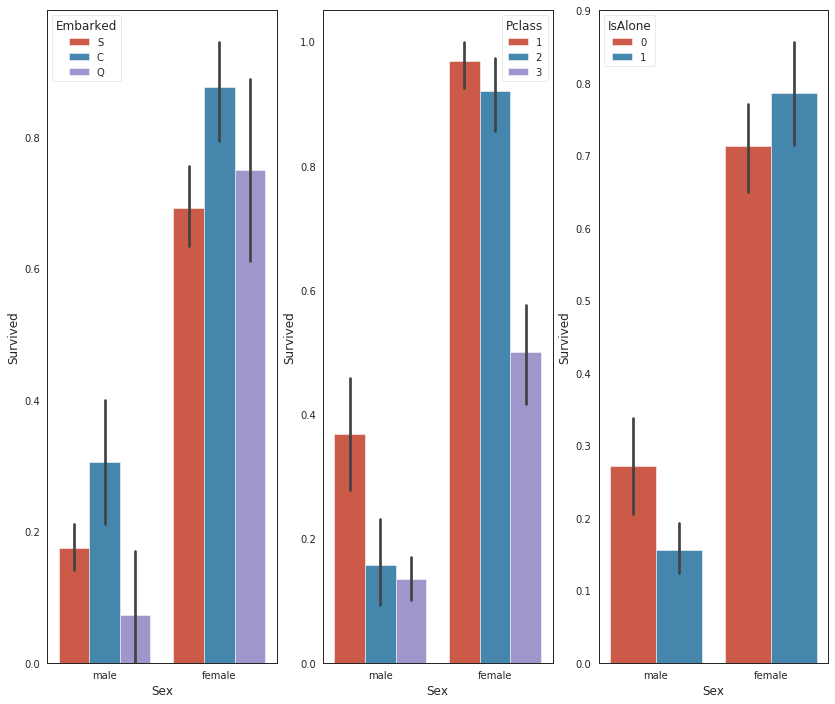

In [0]:
fig, qaxis = plt.subplots(1, 3, figsize=(14, 12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data = data1, ax = qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = data1, ax = qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data = data1, ax = qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')

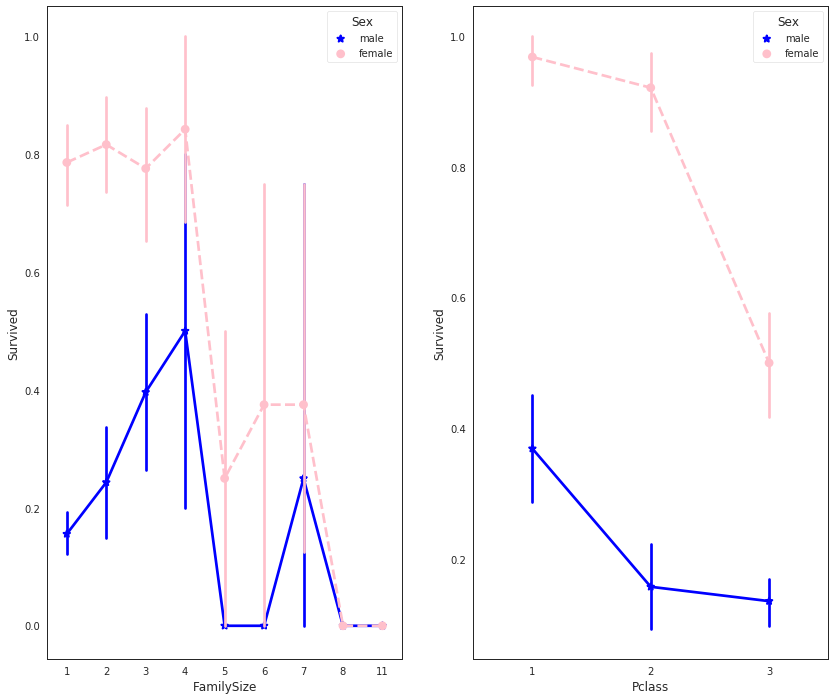

In [0]:
fig, (maxis1, maxis2) = plt.subplots(1, 2, figsize=(14, 12))

sns.pointplot(x = 'FamilySize', y = 'Survived', hue = 'Sex', data=data1, palette={"male": "blue", "female": "pink"}, 
              markers=["*", "o"], linestyles=["-", "--"], ax=maxis1)

sns.pointplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data=data1, palette={"male": "blue", "female": "pink"}, 
              markers=["*", "o"], linestyles=["-", "--"], ax=maxis2)

In [0]:
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,3,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,0,4,2,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]",0,2,2,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,2,4,2,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]",1,2,3,2,1


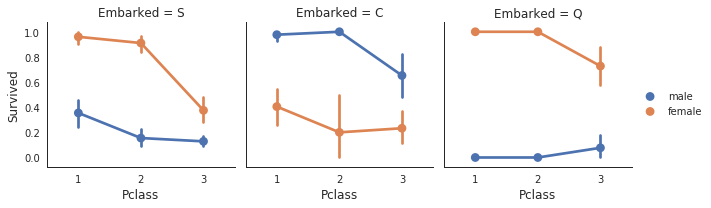

In [0]:
e = sns.FacetGrid(data1, col='Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette='deep')
e.add_legend()

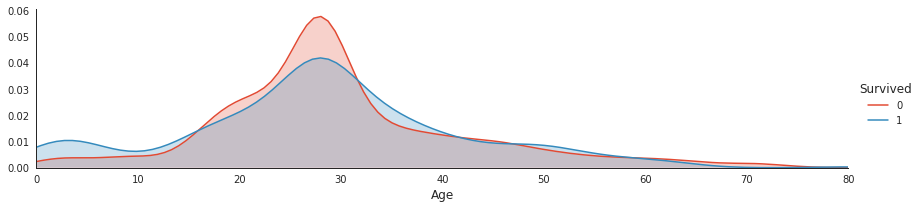

In [0]:
a = sns.FacetGrid(data1, hue='Survived', aspect=4)
a.map(sns.kdeplot, 'Age', shade=True)
a.set(xlim=(0, data1['Age'].max()))
a.add_legend()

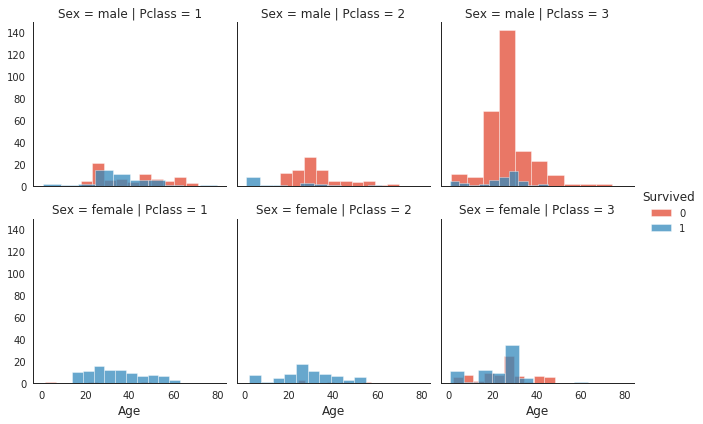

In [0]:
h = sns.FacetGrid(data1, row='Sex', col='Pclass', hue='Survived')
h.map(plt.hist, 'Age', alpha=.75)
h.add_legend()

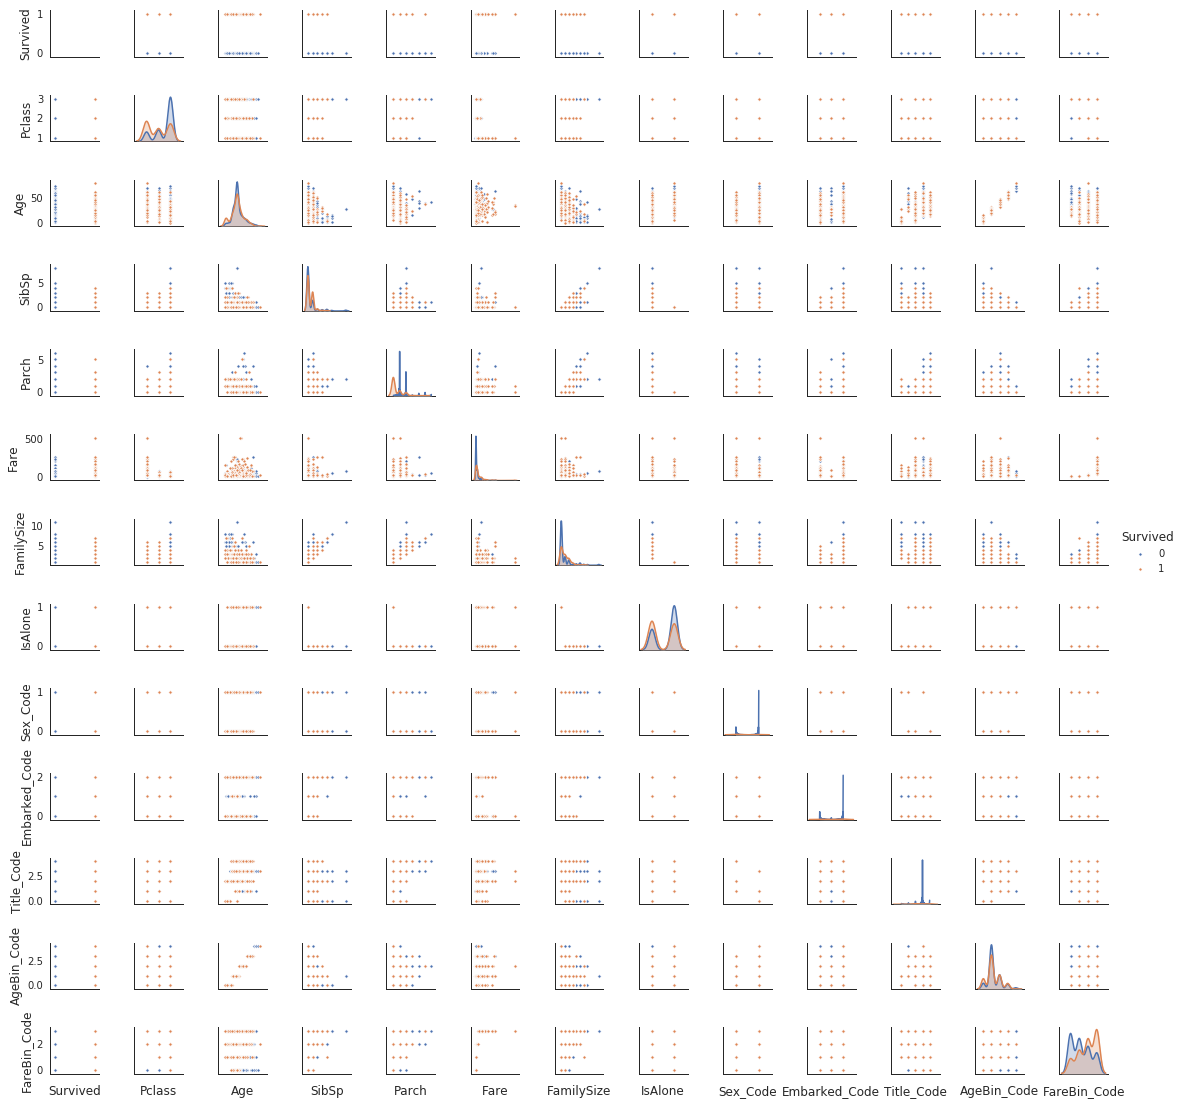

In [0]:
pp = sns.pairplot(data1, hue='Survived', palette='deep', size=1.2, diag_kind='kde', diag_kws=dict(shade=True), plot_kws=dict(s=10))
pp.set(xticklabels=[])

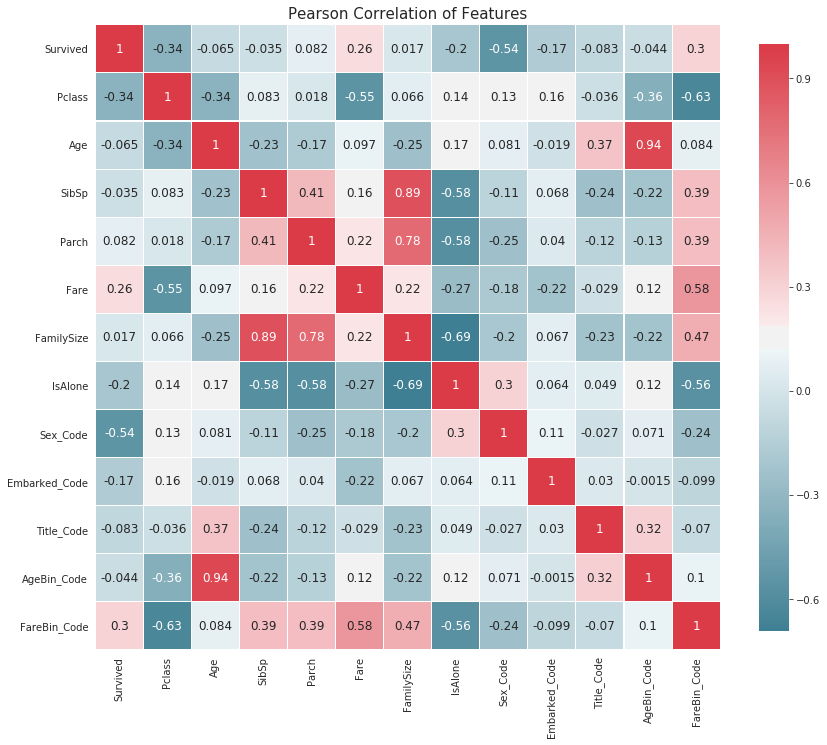

In [0]:
def correlation_heatmap(df):
    _, ax = plt.subplots(figsize=(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)

    _ = sns.heatmap(
        df.corr(),
        cmap = colormap,
        square = True,
        cbar_kws = {'shrink':.9},
        ax = ax,
        annot = True,
        linewidths = 0.1, vmax = 1.0, linecolor = 'white',
        annot_kws = {'fontsize': 12}
    )
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)

데이터 과학은 수학(통계, 선형대수 등), 컴퓨터 과학(프로그래밍 언어, 컴퓨터 시스템 등)과 비즈니스 관리(통신, 과목-물질 지식 등) 사이의 다학제 분야다. 대부분의 데이터 과학자는 세 분야 중 한 분야 출신이기 때문에 그 분야로 기울어지는 경향이 있다. 그러나 데이터 과학은 한쪽 다리가 다른 쪽 다리보다 더 중요한 것이 없는 세 발 달린 걸상과 같다. 그래서 이 단계는 수학에 대한 고급 지식을 필요로 할 것이다. 하지만 걱정마, 우리는 이 커널에서 다룰 높은 수준의 개요만 있으면 돼. 또한, 컴퓨터 과학 덕분에, 많은 무거운 리프팅이 당신을 위해 행해진다. 그래서 한때 수학이나 통계학에서 대학원 학위를 요구했던 문제들은 이제 코드 몇 줄만 가져간다. 마지막으로, 우리는 그 문제를 잘 생각해 볼 수 있는 사업 감각이 필요할 것이다. 결국, 관광견을 훈련시키는 것과 같이, 그것은 우리에게서 배우는 것이지, 반대로 배우는 것이 아니다.

기계학습(ML)은 이름에서 알 수 있듯이, 어떻게 생각해야 하는지가 아니라 어떻게 생각하는지를 기계에 가르치고 있다. 이 주제와 빅데이터는 수십 년 동안 존재해 왔지만, 기업이나 전문직 종사자 모두에게 진입 장벽이 낮기 때문에 그 어느 때보다 인기가 높아지고 있다. 이것은 좋기도 하고 나쁘기도 합니다. 이러한 알고리즘은 이제 현실에서 더 많은 문제를 해결할 수 있는 더 많은 사람들이 접근할 수 있기 때문에 좋다. 진입 수단에 대한 장벽이 낮을수록 더 많은 사람들이 자신들이 사용하고 있는 도구를 알지 못하고 잘못된 결론을 내릴 수 있기 때문에 좋지 않다. 그래서 내가 널 가르치는 데 집중하는 거야. 뭘 해야 할 지 뿐만 아니라, 네가 왜 그렇게 하는지 말이야. 이전에 나는 누군가에게 필립 스크루드라이버를 건네달라고 부탁하는 비유를 썼는데, 그들은 당신에게 일자드라이버나 최악의 망치를 건네주었다. 기껏해야 전혀 이해력이 부족하다는 것을 보여준다. 최악의 경우, 그것은 프로젝트를 완성하는 것을 불가능하게 만들거나 심지어 최악의 경우, 잘못된 실행 가능한 지능을 구현한다. 그래서 내가 내 요점을 망쳐 놓았으니, 내가 너에게 무엇을 해야 하는지 그리고 가장 중요한 것은, 네가 그것을 왜 하는지 보여줄게.

첫째, 기계학습의 목적은 인간의 문제를 해결하는 것이라는 것을 이해해야 한다. 기계 학습은 감독 학습, 감독되지 않는 학습, 강화된 학습으로 분류할 수 있다. 관리 학습은 올바른 답을 포함하는 교육 데이터 세트를 제공하여 모델을 교육하는 과정이다. 무감독 학습은 올바른 답을 포함하지 않는 교육 데이터 세트를 사용하여 모델을 교육하는 것이다. 그리고 강화 학습은 이전의 두 가지와 혼합된 것으로서, 모델에게는 즉시 정답이 주어지지 않고, 나중에 일련의 사건 후에 학습을 강화하기 위한 것이다. 우리는 일련의 특징과 그에 상응하는 목표를 제시함으로써 우리의 알고리즘을 훈련시키고 있기 때문에 감독된 기계 학습을 하고 있다. 그런 다음 우리는 동일한 데이터 집합에서 새로운 서브셋을 제시하고 예측 정확도에 유사한 결과를 얻기를 희망한다.

기계 학습 알고리즘은 여러 가지가 있지만, 목표 변수와 데이터 모델링 목표에 따라 분류, 회귀, 클러스터링 또는 차원 감소의 네 가지 범주로 줄일 수 있다. 클러스터링과 치수 축소를 하루 더 절약하고, 분류와 회귀에 초점을 맞출 겁니다. 연속 표적 변수는 회귀 알고리즘을 필요로 하고 이산 표적 변수는 분류 알고리즘을 필요로 한다고 일반화할 수 있다. 한 쪽지, 로지스틱 회귀는 이름에 회귀는 있지만, 실제로는 분류 알고리즘이다. 우리의 문제는 승객이 살아남았는지 살아남지 못했는지를 예측하는 것이기 때문에 이것은 별개의 목표 변수다. 우리는 분석을 시작하기 위해 스키어 라이브러리의 분류 알고리즘을 사용할 것이다. 우리는 나중에 섹션에서 논의된 교차 검증 및 점수 측정 지표를 사용하여 알고리즘의 성능을 등급화하고 비교할 것이다.

Machine Learning Selection:

* Sklearn Estimator Overview
* Sklearn Estimator Detail
* Choosing Estimator Mind Map
* Choosing Estimator Cheat Sheet

이제 우리는 우리의 해결책을 감독된 학습 분류 알고리즘으로 확인했다. 우리는 선택의 범위를 좁힐 수 있다.

Machine Learning Classification Algorithms:

* Ensemble Methods
* Generalized Linear Models (GLM)
* Naive Bayes
* Nearest Neighbors
* Support Vector Machines (SVM)
* Decision Trees
* Discriminant Analysis


데이터 과학 101: 기계 학습 알고리즘(MLA) 선택 방법
중요: 데이터 모델링에 관한 한, 초심자의 질문은 항상 "최고의 기계 학습 알고리즘은 무엇인가?"이다. 이를 위해 초보자는 기계학습의 무료 급식 이론(NFLT)을 배워야 한다. 간단히 말해서, NFLT는 모든 상황에서, 모든 데이터셋에 가장 잘 작동하는 슈퍼 알고리즘이 없다고 말한다. 따라서 가장 좋은 방법은 여러 개의 MLA를 시도하고, 조정하고, 특정 시나리오에 대해 비교하는 겁니다. 이와 함께, Caruana & Niculescu-Mizil 2006은 MLA 비교의 비디오 강의를 시청하고, NIH가 유전자 선정을 위해 수행한 Ogutu 등 2011년, Fernandez-Delgado 등, 17개 가정의 179개 분류자를 비교한 2014년, Thoma 2016년, Sklearn 비교와 같은 알고리즘을 비교하는 좋은 연구가 수행되었다.더 많은 데이터가 더 나은 알고리즘을 능가한다고 나는 생각한다.

이 모든 정보를 가지고 초심자는 어디서 시작하지? 나무, 바깅, 랜덤 숲, 부스팅으로 시작하는 것을 추천한다. 그들은 기본적으로 의사결정 트리의 다른 구현으로, 가장 쉽게 배우고 이해할 수 있는 개념이다. 그것들은 또한 SVC와 같은 것 보다 다음 절에서 논의되는, 조율하는 것이 더 쉽다. 아래에서는 몇 개의 MLA를 실행하고 비교하는 방법에 대해 개괄적으로 설명하겠지만, 이 커널의 나머지 부분은 의사결정 나무와 그 파생 모델을 통한 데이터 모델링 학습에 초점을 맞출 것이다.

In [0]:
MLA = [
       ensemble.AdaBoostClassifier(),
       ensemble.BaggingClassifier(),
       ensemble.ExtraTreesClassifier(),
       ensemble.GradientBoostingClassifier(),
       ensemble.RandomForestClassifier(),

       gaussian_process.GaussianProcessClassifier(),

       linear_model.LogisticRegressionCV(),
       linear_model.PassiveAggressiveClassifier(),
       linear_model.RidgeClassifierCV(),
       linear_model.SGDClassifier(),
       linear_model.Perceptron(),

       naive_bayes.BernoulliNB(),
       naive_bayes.GaussianNB(),

       neighbors.KNeighborsClassifier(),

       svm.SVC(probability=True),
       svm.NuSVC(probability=True),
       svm.LinearSVC(),

       tree.DecisionTreeClassifier(),
       tree.ExtraTreeClassifier(),

       discriminant_analysis.LinearDiscriminantAnalysis(),
       discriminant_analysis.QuadraticDiscriminantAnalysis(),

       XGBClassifier()
]

cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=.3, train_size=.6, random_state=0)

MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD', 'MLA Time']
MLA_compare = pd.DataFrame(columns=MLA_columns)

MLA_predict = data1[Target]

In [0]:
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time


In [0]:
row_index = 0
for alg in MLA:
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())

    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv=cv_split, return_train_score=True)
    # print(cv_results.keys())
    # break
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()

    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3

    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])

    row_index += 1

MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending=False, inplace=True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.856367,0.829478,0.0527546,0.0307388
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.837266,0.826119,0.0453876,0.0434208
17,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.895131,0.823507,0.0541611,0.00358629
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.866667,0.822761,0.0498731,0.0774665
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.835768,0.822761,0.0493681,0.0520835
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.895131,0.820522,0.0460046,0.0155771
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.89176,0.81791,0.0707619,0.0192266
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.889513,0.816791,0.0560708,0.0218448
18,ExtraTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.895131,0.814552,0.0732418,0.00334103
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.850375,0.813806,0.0690863,0.00384862


Text(0, 0.5, 'Algorithm')

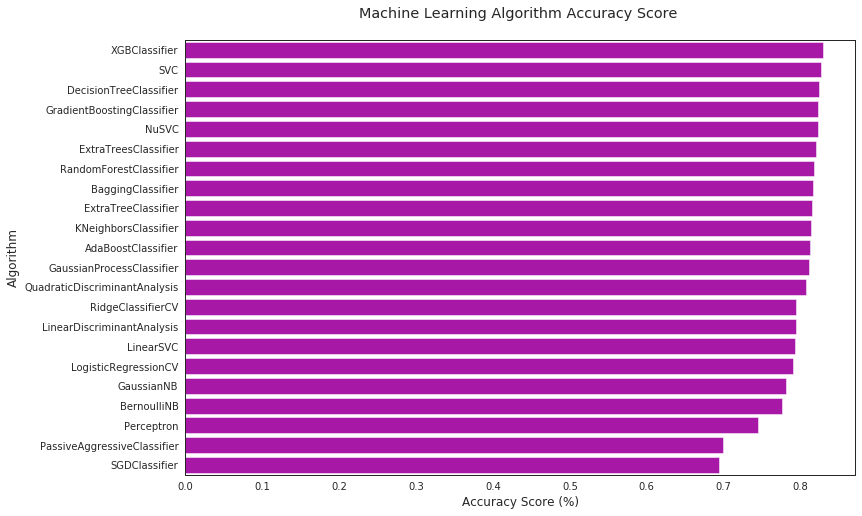

In [0]:
sns.barplot(x='MLA Test Accuracy Mean', y='MLA Name', data=MLA_compare, color='m')

plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

모델 성능 평가
몇 가지 기본적인 데이터 청소, 분석 및 기계 학습 알고리즘(MLA)을 통해 최대 82%의 정확도로 탑승객 생존을 예측할 수 있음을 요약해 보자. 코드 몇 줄이면 나쁘지 않아. 하지만 우리가 항상 묻고 싶은 질문은, 우리가 투자한 시간에 대해 더 잘하고 더 중요한 것은 ROI(투자 수익)를 얻을 수 있는가 하는 것이다. 예를 들어, 정확도를 1/10 정도만 높인다면, 정말 3개월간의 개발 가치가 있는 것인가? 만약 당신이 연구에 종사한다면 아마도 답은 "예"일 것이다. 하지만 당신이 사업에서 일한다면 대답은 "아니오"일 것이다. 따라서 모델을 개선할 때는 이 점을 명심하십시오.

데이터 과학 101: 기준 정확도 결정
어떻게 하면 더 나은 모델을 만들 수 있을지 결정하기 전에, 우리 모델이 유지될 가치가 있는지 결정하자. 그러기 위해서는 데이터 과학 101의 기본으로 돌아가야 한다. 우리는 이것이 2진법적인 문제라는 것을 안다. 왜냐하면 승객들은 살아남았거나 죽었기 때문이다. 그래서 동전 던지기 문제처럼 생각해봐. 만약 당신이 공정한 동전을 가지고 있고 당신이 머리나 꼬리를 추측했다면, 당신은 50 대 50의 정확한 추측을 할 가능성이 있다. 그래서 50%를 최악의 모델로 삼자. 그보다 더 낮은 것이 있다면, 왜 내가 동전을 던질 수 있는데 네가 필요한가?

데이터셋에 대한 정보가 없어도 바이너리 문제로 50%를 얻을 수 있어 하지만 우리는 데이터셋에 대한 정보를 가지고 있기 때문에 더 잘 할 수 있을 겁니다. 우리는 1,502/2,224명 혹은 67.5%의 사람들이 죽었다는 것을 안다. 따라서 가장 빈번한 발생, 즉 100%의 사망자가 발생한다고 예측한다면, 그 당시 우리는 67.5%가 옳을 것이다. 68%를 나쁜 모델 성능으로 설정해 봅시다. 왜냐하면, 다시 말하지만, 가장 자주 발생하는 것을 예측할 수 있는데, 왜 내가 당신을 필요로 하느냐는 겁니다.

데이터 과학 101: 자신만의 모델을 만드는 방법
정확도가 높아지고 있는데 더 잘할 수 있을까. 우리 데이터에 무슨 신호라도 있나? 이것을 설명하기 위해, 우리는 우리 자신의 의사결정 트리 모델을 만들 것이다. 왜냐하면 그것은 개념화하기 가장 쉽고 간단한 덧셈과 곱셈 계산이 필요하기 때문이다. 의사결정 트리를 작성할 때, 남은/1과 dead/0을 동종 부분군에 배치하여 목표 응답을 세분화하는 질문을 할 수 있다. 이것은 부분적인 과학과 부분적인 예술이기 때문에, 여러분에게 그것이 어떻게 작동하는지 보여주기 위해 21개의 질문 게임을 해봅시다. 스스로 따라가려면 열차 데이터 세트를 다운로드하여 Excel로 가져오십시오. 열, 카운트 및 값의 행 개수 % 및 행에 아래에 설명된 형상이 있는 피벗 테이블을 만드십시오.

게임의 이름은 의사결정 트리 모델을 사용하여 한 버킷에서 1번 생존하고 다른 버킷에서 1번 사망/0번 생존을 위해 하위 그룹을 만드는 것을 기억하십시오. 우리의 주먹구구식 규칙이 될 것이다. 즉, 과반수 또는 50% 이상이 살아남았다면, 우리 부분군의 모든 사람이 살아남은 것이다/1 그러나 만약 50% 이하가 살아남았다면, 우리 부분군의 모든 사람이 죽었을 때/0. 또한 부분군이 10보다 작거나 모델 정확도 고원 또는 감소하는 경우 정지한다. 알겠어요? 어서 가자!

질문 1: 타이타닉에 있었니? 만약 그렇다면, 과반수(62%)가 죽었을 것이다. 우리의 표본 생존은 68%의 인구와 다르다. 그럼에도 불구하고, 만약 우리가 모든 사람이 죽었다고 가정한다면, 우리의 표본 정확도는 62%이다.

질문 2: 너는 남자니 아니면 여자니? 남성, 과반수(81%)가 사망했다. 여성(74%)이 살아남았다. 우리에게 79%의 정확성을 부여한다.

질문 3A(카운트 = 314로 여성 분기를 내려감): 너 1, 2, 3반이니? 1등급(97%)은 살아남았고 2등급(92%)은 살아남았다. 죽은 부분군이 10명도 안 되기 때문에 우리는 이 지점의 하강을 중지할 것이다. 3등급은 심지어 50 대 50으로 나뉘어져 있다. 우리의 모델을 개선하기 위한 어떤 새로운 정보도 얻지 못했다.

질문 4A(카운트 = 144인 여성 클래스 3 지점으로 내려감): C항, Q항, S항은 출항하셨습니까? 우리는 약간의 정보를 얻는다. C와 Q, 대다수가 아직 살아남았으니 변화가 없다. 또, 죽은 부분군은 10명도 안 되기 때문에 중지한다. S, 과반수(63%)가 사망했다. 그래서 우리는 3등급의 암컷을 그들이 살아남았다고 가정하는 것에서 그들이 죽었다고 가정하는 것으로 바꿀 것이다. 우리 모델의 정확도는 81%로 증가한다.

질문 5A(카운트 = 88인 여성 클래스 3 승선 S 지점 아래로 내려감): 지금까지는 우리가 좋은 결정을 내린 것 같다. 한 단계 더 추가하는 것은 더 많은 정보를 얻는 것 같지 않다. 이 서브그룹 55는 죽고 33은 살아남았다. 대다수가 죽었기 때문에 우리는 33이나 서브그룹을 식별하기 위한 신호를 찾아야 한다. 우리는 이목구비로 놀 수 있다. 내가 발견한 것은 요금 0-8이었다. 대다수가 살아남았다. 11-9 사이즈의 작은 표본이지만, 통계에 자주 사용된다. 우리는 정확도를 약간 향상시키지만 82%를 넘어서는 것은 그리 많지 않다. 자, 이제 그만합시다.

질문 3B(카운트 = 577인 남성 분기점 아래로 내려감): 2번 질문으로 돌아가서, 우리는 대다수의 수컷들이 죽었다는 것을 안다. 그래서 우리는 대다수가 살아남은 부분군을 식별하는 특징을 찾고 있다. 놀랍게도, 수업이나 심지어 승선하는 것은 여성들에게 그랬던 것처럼 중요하지 않았지만, 타이틀은 우리에게 82%를 가져다 준다. 추측하고 다른 특징들을 확인해보면 82%를 넘기지 않는 것 같다. 자, 일단 여기서 멈추자.

아주 적은 정보로 우리는 82%의 정확도를 얻는다. 최악의 경우 82%를 좋은 쪽으로, 좋은 결과를 얻을 수 있는 간단한 모델이기 때문에, 우리는 좋은 쪽으로 82%를 정할 것이다. 하지만 문제는 여전히 남아 있다, 우리가 우리의 수제 모델보다 더 잘할 수 있을까?

하기 전에, 방금 위에 쓴 것을 코드화하자. 이것은 "손"에 의해 만들어진 수동 프로세스라는 점을 유념하십시오. 이렇게 할 필요는 없겠지만 MLA와 함께 일하기 전에 이해하는 것이 중요하다.

In [0]:
dates = [['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04'],
         ['2019-02-01', '2019-02-02', '2019-02-03', '2019-02-04']]

df = pd.DataFrame(dates, columns=['A', 'B', 'C', 'D'])

for cl in df:
    print(cl)
print('-'*10)
for key, value in df.iteritems():
    print(key)
    print(value)
print('-'*10)
for row_num, row in df.iterrows():
    print(row_num)
    print(row)
print('-'*10)
for row in df.itertuples():
    print(row)
for row in df.itertuples():
    index_num = row[0]
    print(index_num)

A
B
C
D
----------
A
0    2019-01-01
1    2019-02-01
Name: A, dtype: object
B
0    2019-01-02
1    2019-02-02
Name: B, dtype: object
C
0    2019-01-03
1    2019-02-03
Name: C, dtype: object
D
0    2019-01-04
1    2019-02-04
Name: D, dtype: object
----------
0
A    2019-01-01
B    2019-01-02
C    2019-01-03
D    2019-01-04
Name: 0, dtype: object
1
A    2019-02-01
B    2019-02-02
C    2019-02-03
D    2019-02-04
Name: 1, dtype: object
----------
Pandas(Index=0, A='2019-01-01', B='2019-01-02', C='2019-01-03', D='2019-01-04')
Pandas(Index=1, A='2019-02-01', B='2019-02-02', C='2019-02-03', D='2019-02-04')
0
1


In [0]:
for index, row in data1.iterrows():
    if random.random() > .5:
        data1.set_value(index, 'Random_Predict', 1)
    else:
        data1.set_value(index, 'Random_Predict', 0)

data1['Random_Score'] = 0
data1.loc[(data1['Survived'] == data1['Random_Predict']), 'Random_Score'] == 1
print('Coin Flip Model Accuracy: {:.2f}%'.format(data1['Random_Score'].mean()*100))

print('Coin Flip Model Accuracy w/SciKit: {:.2f}%'.format(metrics.accuracy_score(data1['Survived'], data1['Random_Predict'])*100))

Coin Flip Model Accuracy: 0.00%
Coin Flip Model Accuracy w/SciKit: 50.17%


In [0]:
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code,Random_Predict,Random_Score
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,3,1,0,1.0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,0,4,2,3,1.0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]",0,2,2,1,1,1.0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,2,4,2,3,1.0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]",1,2,3,2,1,0.0,0


In [0]:
pivot_female = data1[data1.Sex == 'female'].groupby(['Sex', 'Pclass', 'Embarked', 'FareBin'])['Survived'].mean()
print('Survival Decision Tree w/Female Node: \n', pivot_female)

Survival Decision Tree w/Female Node: 
 Sex     Pclass  Embarked  FareBin        
female  1       C         (-0.001, 7.91]          NaN
                          (7.91, 14.454]          NaN
                          (14.454, 31.0]     0.666667
                          (31.0, 512.329]    1.000000
                Q         (-0.001, 7.91]          NaN
                          (7.91, 14.454]          NaN
                          (14.454, 31.0]          NaN
                          (31.0, 512.329]    1.000000
                S         (-0.001, 7.91]          NaN
                          (7.91, 14.454]          NaN
                          (14.454, 31.0]     1.000000
                          (31.0, 512.329]    0.955556
        2       C         (-0.001, 7.91]          NaN
                          (7.91, 14.454]     1.000000
                          (14.454, 31.0]     1.000000
                          (31.0, 512.329]    1.000000
                Q         (-0.001, 7.91]          NaN


In [0]:
pd.DataFrame(pivot_female)

Survived
Sex    Pclass Embarked FareBin                  
female 1      C        (-0.001, 7.91]        NaN
                       (7.91, 14.454]        NaN
                       (14.454, 31.0]   0.666667
                       (31.0, 512.329]  1.000000
              Q        (-0.001, 7.91]        NaN
                       (7.91, 14.454]        NaN
                       (14.454, 31.0]        NaN
                       (31.0, 512.329]  1.000000
              S        (-0.001, 7.91]        NaN
                       (7.91, 14.454]        NaN
                       (14.454, 31.0]   1.000000
                       (31.0, 512.329]  0.955556
       2      C        (-0.001, 7.91]        NaN
                       (7.91, 14.454]   1.000000
                       (14.454, 31.0]   1.000000
                       (31.0, 512.329]  1.000000
              Q        (-0.001, 7.91]        NaN
                       (7.91, 14.454]   1.000000
                       (14.454, 31.0]        NaN
                       (31.0, 512.329]       NaN
              S        (-0.001, 7.91]        NaN
                       (7.91, 14.454]   0.875000
                       (14.454, 31.0]   0.916667
                       (31.0, 512.329]  1.000000
       3      C        (-0.001, 7.91]   1.000000
                       (7.91, 14.454]   0.428571
                       (14.454, 31.0]   0.666667
                       (31.0, 512.329]       NaN
              Q        (-0.001, 7.91]   0.750000
                       (7.91, 14.454]   0.500000
                       (14.454, 31.0]   0.714286
                       (31.0, 512.329]       NaN
              S        (-0.001, 7.91]   0.533333
                       (7.91, 14.454]   0.448276
                       (14.454, 31.0]   0.357143
                       (31.0, 512.329]  0.125000

In [0]:
pivot_male = data1[data1.Sex == 'male'].groupby(['Sex', 'Title'])['Survived'].mean()
print('\n\nSurvival Decision Tree w/Male Node: \n', pivot_male)



Survival Decision Tree w/Male Node: 
 Sex   Title 
male  Master    0.575000
      Misc      0.250000
      Mr        0.156673
Name: Survived, dtype: float64


In [0]:
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code,Random_Predict,Random_Score
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,3,1,0,1.0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,0,4,2,3,1.0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]",0,2,2,1,1,1.0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,2,4,2,3,1.0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]",1,2,3,2,1,0.0,0


In [0]:
def mytree(df):
    Model = pd.DataFrame(data={'Predict': []})
    male_title = ['Master']

    for index, row in df.iterrows():
        Model.loc[index, 'Predict'] = 0
        
        if (df.loc[index, 'Sex'] == 'female'):
            Model.loc[index, 'Predict'] = 1
        
        if ((df.loc[index, 'Sex'] == 'female') &
            (df.loc[index, 'Pclass'] == 3) &
            (df.loc[index, 'Embarked'] == 'S') &
            (df.loc[index, 'Fare'] > 8)):
            Model.loc[index, 'Predict'] = 0
        
        if ((df.loc[index, 'Sex'] == 'male') &
            (df.loc[index, 'Title'] in male_title)):
            Model.loc[index, 'Predict'] = 1
    
    return Model

Tree_Predict = mytree(data1)
print('Decision Tree Model Accuracy/Precision Score: {:.2f}%\n'.format(metrics.accuracy_score(data1['Survived'], Tree_Predict)*100))

print(metrics.classification_report(data1['Survived'], Tree_Predict))

Decision Tree Model Accuracy/Precision Score: 82.04%

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       549
           1       0.82      0.68      0.75       342

    accuracy                           0.82       891
   macro avg       0.82      0.79      0.80       891
weighted avg       0.82      0.82      0.82       891



Confusion matrix, without normalization
[[497  52]
 [108 234]]
Normalized confusion matrix
[[0.91 0.09]
 [0.32 0.68]]


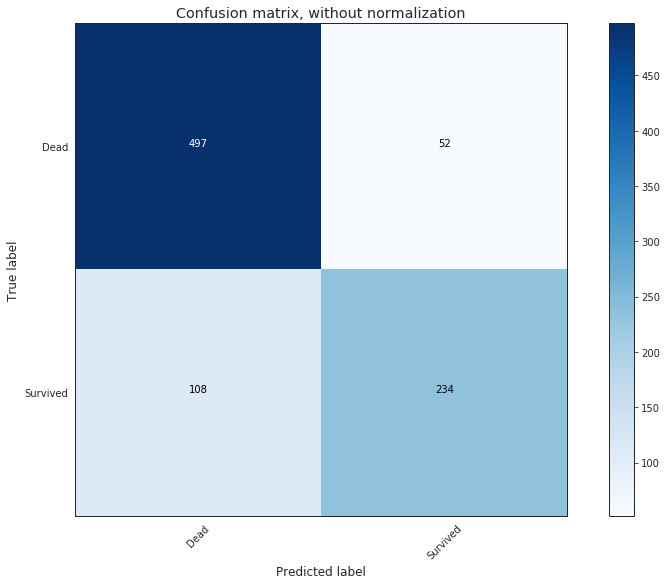

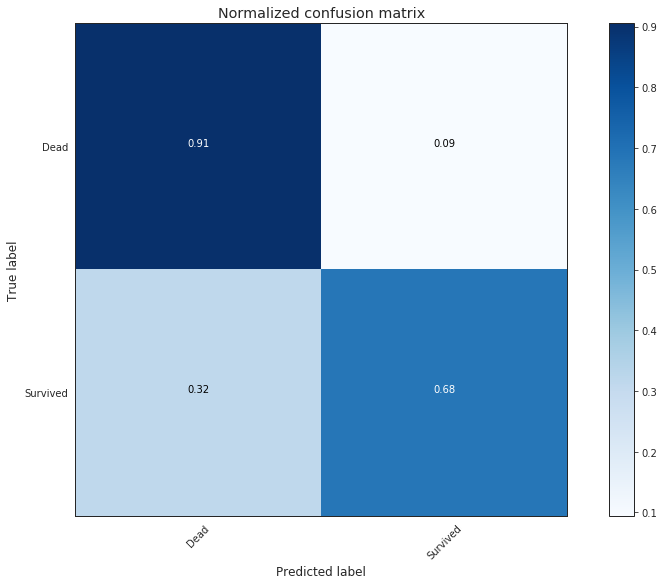

In [0]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = metrics.confusion_matrix(data1['Survived'], Tree_Predict)
np.set_printoptions(precision=2)

class_names = ['Dead', 'Survived']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')

5.0단계에서는 Sklearn cross_validate 기능을 사용하여 모델 성능을 교육하고 테스트하고 점수를 매겼다.

기억하라. 우리는 우리의 모델을 평가하기 위해 우리의 모델을 만들기 위해 열차 데이터를 위해 다른 서브셋을 사용하는 것이 중요하다. 그렇지 않으면 우리 모델은 오버핏될 것이다. 즉, 이미 본 데이터를 "예측"하는 것은 훌륭하지만, 본 적이 없는 데이터를 예측하는 것은 형편없다는 것을 의미하며, 이는 전혀 예측이 아니다. 100%를 얻기 위해 학교 퀴즈를 속이는 것과 같으나, 시험을 보러 갈 때는 진정으로 배운 것이 없기 때문에 실패한다. 기계학습도 마찬가지다.

CV는 기본적으로 모델을 여러 번 분할하고 점수를 매기는 지름길이기 때문에 보이지 않는 데이터에 대해 그것이 얼마나 잘 수행될 것인지 알 수 있다. 컴퓨터 처리에 있어서는 좀 더 비싸지만, 우리가 잘못된 신뢰를 얻지 않도록 하는 것이 중요하다. 이것은 일관성이 중요하고 놀라움을 피해야 하는 카글 경기나 사용 사례에서 유용하다.

CV 외에도, 우리는 시험 점수에서 좀 더 무작위성을 허용하기 위해 맞춤형 스키어 열차 시험 스플리터를 사용했다. 아래는 기본 CV 분할 이미지 입니다.

Hyper-Parameter를 사용한 튜닝
Sklearn Decision Tree (DT) Classifier를 사용했을 때, 우리는 모든 기능 기본값을 받아들였다. 이렇게 하면 다양한 하이퍼 파라미터 설정이 모델 정확도를 어떻게 변화시킬지 알 수 있다. (파라미터 대 하이퍼 파라미터에 대해 자세히 알아보려면 여기를 클릭하십시오.)

하지만, 모델을 조정하기 위해서는, 우리는 실제로 그것을 이해할 필요가 있다. 그래서 앞부분에서 시간을 내서 예측이 어떻게 작용하는지 보여드린 겁니다. 이제 DT 알고리즘에 대해 좀 더 배워봅시다.


의사결정 트리의 장점은 다음과 같다.

이해하기 쉽고 해석하기 쉽다. 나무는 시각화할 수 있다.
데이터 준비는 거의 필요하지 않다. 다른 기법들은 종종 데이터 정상화를 요구하고, 더미 변수를 만들고 빈 값을 제거해야 한다. 그러나 이 모듈은 결측값을 지원하지 않는다는 점에 유의하십시오.
트리를 사용하는 비용(즉, 데이터 예측)은 트리를 훈련시키는 데 사용되는 데이터 포인트의 수에서 로가리듬이 된다.
수치 데이터와 범주형 데이터를 모두 처리할 수 있다. 다른 기법들은 대개 한 종류의 변수만 있는 데이터셋을 분석하는 데 전문화되어 있다. 자세한 내용은 알고리즘을 참조하십시오.
다중 출력 문제를 처리할 수 있다.
흰색 박스 모델을 사용한다. 모델에서 주어진 상황을 관찰할 수 있는 경우, 조건에 대한 설명은 부울 논리에 의해 쉽게 설명된다. 이와는 대조적으로 블랙박스 모델(예: 인공신경망)에서는 결과를 해석하기가 더 어려울 수 있다.
통계적 시험을 이용하여 모델을 검증할 수 있다. 그것은 모델의 신뢰성을 설명할 수 있게 한다.
데이터가 생성된 실제 모델에 의해 그 가정이 다소 위반되더라도 잘 수행된다.
의사결정 트리의 단점은 다음과 같다.

의사결정 트리 학습자는 데이터를 잘 일반화하지 않는 지나치게 복잡한 트리를 만들 수 있다. 이것을 오버핏이라고 한다. 이 문제를 피하기 위해 가지치기(현재 지원되지 않음), 리프 노드에서 필요한 최소 샘플 수 설정 또는 트리의 최대 깊이 설정과 같은 메커니즘이 필요하다.
의사결정 트리는 데이터의 작은 변화로 인해 전혀 다른 트리가 생성될 수 있기 때문에 불안정할 수 있다. 이 문제는 앙상블 내에서 의사결정 트리를 사용함으로써 완화된다.
최적의 의사결정 트리를 학습하는 문제는 최적성과 단순한 개념의 여러 측면에서도 NP-완전한 것으로 알려져 있다. 따라서 실질적인 의사결정 트리 학습 알고리즘은 각 노드에서 국지적으로 최적의 결정이 이루어지는 탐욕 알고리즘과 같은 경험적 알고리즘에 기초한다. 그러한 알고리즘은 전 세계적으로 최적의 의사결정 트리를 반환한다는 것을 보장할 수 없다. 이는 형상 및 샘플이 교체와 함께 무작위로 샘플링되는 앙상블 학습기에서 복수의 트리를 훈련시킴으로써 완화할 수 있다.
의사결정 트리는 XOR, 패리티 또는 멀티플렉서 문제와 같이 쉽게 표현하지 않기 때문에 배우기 어려운 개념들이 있다.
의사결정 나무 학습자들은 일부 계층이 지배하면 편파적인 나무를 만든다. 따라서 의사결정 트리에 맞추기 전에 데이터 집합의 균형을 맞추는 것이 좋다.


다음은 사용 가능한 하이퍼 파라미터 및 디펜션이다.
class sklearn.tree.DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

ParameterGrid, GridSearchCV 및 맞춤형 스키어 점수를 사용하여 모델을 조정할 것이다. ROC_AUC 점수에 대해 자세히 알아보려면 여기를 클릭하십시오. 그리고 나서 우리는 흑자로 우리의 나무를 시각화할 것이다. ROC_AUC 점수에 대한 자세한 내용을 보려면 여기를 클릭하십시

In [0]:
cv_split

ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=0.6)

In [0]:
dtree = tree.DecisionTreeClassifier(random_state=0)
base_results = model_selection.cross_validate(dtree, data1[data1_x_bin], data1[Target], cv = cv_split, return_train_score=True)
dtree.fit(data1[data1_x_bin], data1[Target])

print('BEFORE DT Parameters: ', dtree.get_params())
print('BEFORE DT Training w/bin score mean: {:.2f}'.format(base_results['train_score'].mean()*100))
print('BEFORE DT Test w/bin score mean: {:.2f}'.format(base_results['test_score'].mean()*100))
print('BEFORE DT Test w/bin score 3*std: +/- {:.2f}'.format(base_results['test_score'].std()*100*3))
print('-'*10)

param_grid = {'criterion': ['gini', 'entropy'],
            #   'splitter': ['best', 'random'],
              'max_depth': [2, 4, 6, 8, 10, None],
            #   'min_samples_split': [2, 5, 10, .03, .05],
            #   'min_samples_leaf': [1, 5, 10, .03, .05],
            #   'max_features': [None, 'auto'],
              'random_state': [0]}

tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring='roc_auc', cv=cv_split, return_train_score=True)
tune_model.fit(data1[data1_x_bin], data1[Target])

print('AFTER DT Parameters: ', tune_model.best_params_)
print('AFTER DT Training w/bin score mean: {:.2f}'.format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print('AFTER DT Test w/bin score mean: {:.2f}'.format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
# print(tune_model.cv_results_['mean_test_score'])
print('AFTER DT Test w/bin score 3*std: +/- {:.2f}'.format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)

BEFORE DT Parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training w/bin score mean: 89.51
BEFORE DT Test w/bin score mean: 82.09
BEFORE DT Test w/bin score 3*std: +/- 5.57
----------
AFTER DT Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT Training w/bin score mean: 89.35
AFTER DT Test w/bin score mean: 87.40
AFTER DT Test w/bin score 3*std: +/- 5.00
----------


처음에 언급했듯이, 더 많은 예측 변수가 더 나은 모형을 만드는 것이 아니라, 올바른 예측 변수는 더 나은 모형을 만드는 것이다. 그래서 데이터 모델링의 또 다른 단계는 피쳐 선택이다. Sklearn은 여러 가지 옵션을 가지고 있으며, 우리는 교차 검증(CV)과 함께 반복 기능 제거(RFE)를 사용할 것이다.

In [0]:
print('before dt rfe training shape old: ', data1[data1_x_bin].shape)
print('before dt rfe training columns old: ', data1[data1_x_bin].columns.values)

print('before dt rfe training w/bin score mean: {:.2f}'.format(base_results['train_score'].mean()*100))
print('before dt rfe test w/bin score mean: {:.2f}'.format(base_results['test_score'].mean()*100))
print('before dt rfe test w/bin score 3*std: +/- {:.2f}'.format(base_results['test_score'].std()*100*3))
print('-'*10)

dtree_rfe = feature_selection.RFECV(dtree, step=1, scoring='accuracy', cv=cv_split)
dtree_rfe.fit(data1[data1_x_bin], data1[Target])

X_rfe = data1[data1_x_bin].columns.values[dtree_rfe.get_support()]
rfe_results = model_selection.cross_validate(dtree, data1[X_rfe], data1[Target], cv=cv_split, return_train_score=True)

print(dtree_rfe.grid_scores_)
print('after dt rfe training shape new: ', data1[X_rfe].shape)
print('after dt rfe training columns new: ', X_rfe)
print('after dt rfe training w/bin score mean: {:.2f}'.format(rfe_results['train_score'].mean()*100))
print('after dt rfe test w/bin score mean: {:.2f}'.format(rfe_results['test_score'].mean()*100))
print('after dt rfe test w/bin score 3*std: +/- {:.2f}'.format(rfe_results['test_score'].std()*100*3))
print('-'*10)

# tune rfe model
rfe_tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring='roc_auc', cv=cv_split, return_train_score=True)
rfe_tune_model.fit(data1[X_rfe], data1[Target])

print('after dt rfe tuned parameters: ', rfe_tune_model.best_params_)
print('after dt rfe tuned training w/bin score mean: {:.2f}'.format(rfe_tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print('after dt rfe tuned test w/bin score mean: {:.2f}'.format(rfe_tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('after dt rfe tuned test w/bin score 3*std: +/- {:.2f}'.format(rfe_tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)

before dt rfe training shape old:  (891, 7)
before dt rfe training columns old:  ['Sex_Code' 'Pclass' 'Embarked_Code' 'Title_Code' 'FamilySize'
 'AgeBin_Code' 'FareBin_Code']
before dt rfe training w/bin score mean: 89.51
before dt rfe test w/bin score mean: 82.09
before dt rfe test w/bin score 3*std: +/- 5.57
----------
[0.79 0.78 0.8  0.8  0.81 0.83 0.82]
after dt rfe training shape new:  (891, 6)
after dt rfe training columns new:  ['Sex_Code' 'Pclass' 'Title_Code' 'FamilySize' 'AgeBin_Code'
 'FareBin_Code']
after dt rfe training w/bin score mean: 88.16
after dt rfe test w/bin score mean: 83.06
after dt rfe test w/bin score 3*std: +/- 6.22
----------
after dt rfe tuned parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
after dt rfe tuned training w/bin score mean: 89.39
after dt rfe tuned test w/bin score mean: 87.34
after dt rfe tuned test w/bin score 3*std: +/- 6.21
----------


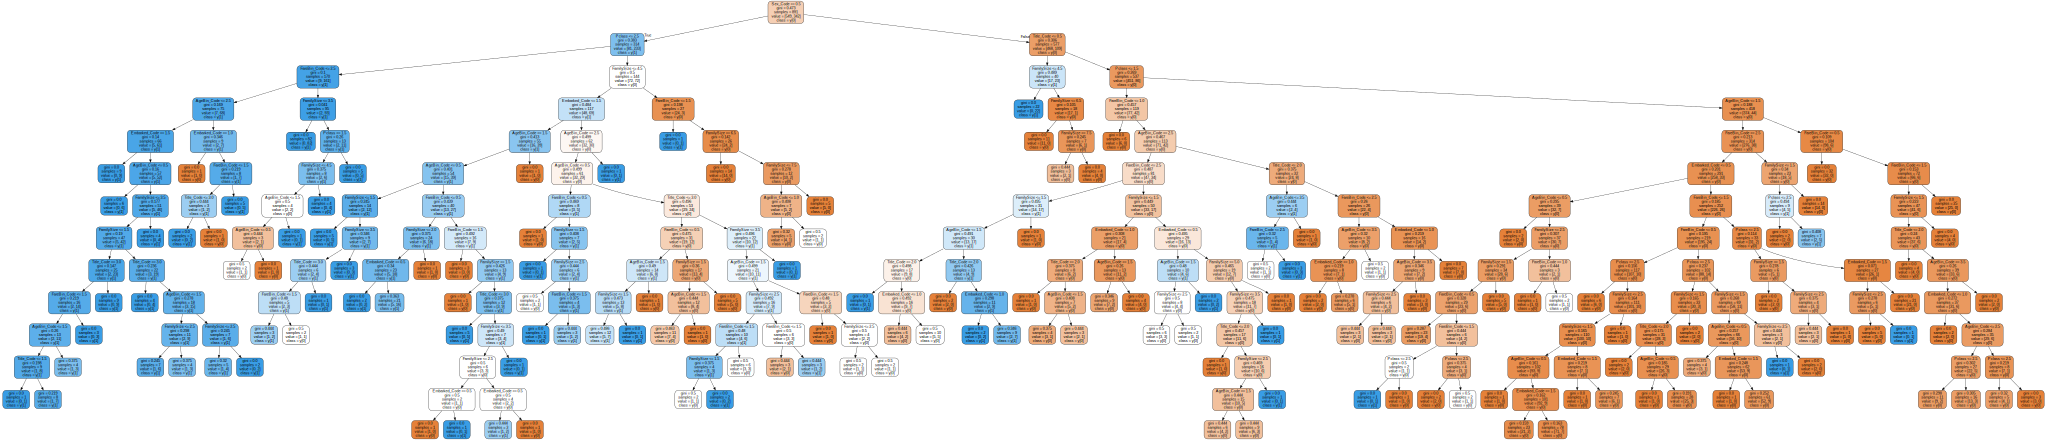

In [0]:
import graphviz
dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=data1_x_bin, class_names=True, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

검증 및 구현(Validate and Implement)

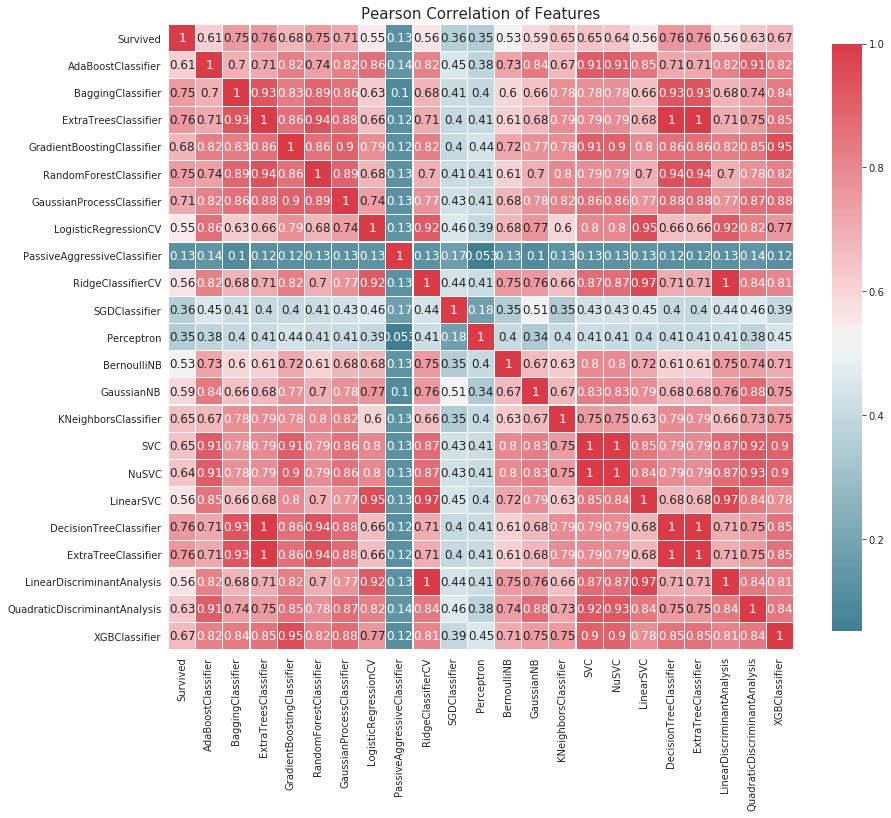

In [0]:
# line 96 MLA_predict

correlation_heatmap(MLA_predict)

In [0]:
vote_est = [
            ('ada', ensemble.AdaBoostClassifier()),
            ('bc', ensemble.BaggingClassifier()),
            ('etc', ensemble.ExtraTreesClassifier()),
            ('gbc', ensemble.GradientBoostingClassifier()),
            ('rfc', ensemble.RandomForestClassifier()),

            ('gpc', gaussian_process.GaussianProcessClassifier()),

            ('lr', linear_model.LogisticRegressionCV()),

            ('bnb', naive_bayes.BernoulliNB()),
            ('gnb', naive_bayes.GaussianNB()),

            ('knn', neighbors.KNeighborsClassifier()),

            ('svc', svm.SVC(probability=True)),

            ('xgb', XGBClassifier())
]

vote_hard = ensemble.VotingClassifier(estimators=vote_est, voting='hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, data1[data1_x_bin], data1[Target], cv=cv_split, return_train_score=True)
vote_hard.fit(data1[data1_x_bin], data1[Target])

print('Hard Voting Training w/bin score mean: {:.2f}'.format(vote_hard_cv['train_score'].mean()*100))
print('Hard Voting Test w/bin score mean: {:.2f}'.format(vote_hard_cv['test_score'].mean()*100))
print('Hard Voting Test w/bin score 3*std: +/- {:.2f}'.format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)

vote_soft = ensemble.VotingClassifier(estimators=vote_est, voting='soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, data1[data1_x_bin], data1[Target], cv=cv_split, return_train_score=True)
vote_soft.fit(data1[data1_x_bin], data1[Target])

print('Soft Voting Training w/bin score mean: {:.2f}'.format(vote_soft_cv['train_score'].mean()*100))
print('Soft Voting Test w/bin score mean: {:.2f}'.format(vote_soft_cv['test_score'].mean()*100))
print('Soft Voting Test w/bin score 3*std: +/- {:.2f}'.format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)

Hard Voting Training w/bin score mean: 86.57
Hard Voting Test w/bin score mean: 82.28
Hard Voting Test w/bin score 3*std: +/- 4.40
----------
Soft Voting Training w/bin score mean: 87.17
Soft Voting Test w/bin score mean: 82.39
Soft Voting Test w/bin score 3*std: +/- 4.87
----------


In [0]:
grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]

grid_param = [
              [{ # AdaBoostClassifier
                  'n_estimators': grid_n_estimator,
                  'learning_rate': grid_learn,
                  'random_state': grid_seed
              }],
              [{ # BaggingClassifier
                  'n_estimators': grid_n_estimator,
                  'max_samples': grid_ratio,
                  'random_state': grid_seed
              }],
              [{ # ExtraTreeClassifier
                  'n_estimators': grid_n_estimator,
                  'criterion': grid_criterion,
                  'max_depth': grid_max_depth,
                  'random_state': grid_seed
              }],
              [{ # GradientBoostingClassifier
                  'learning_rate': [.05],
                  'n_estimators': [300],
                  'max_depth': grid_max_depth,
                  'random_state': grid_seed
              }],
              [{ # RandomForestClassifier
                  'n_estimators': grid_n_estimator,
                  'criterion': grid_criterion,
                  'max_depth': grid_max_depth,
                  'oob_score': [True],
                  'random_state': grid_seed
              }],
              [{ # GaussianProcessClassifier
                  'max_iter_predict': grid_n_estimator,
                  'random_state': grid_seed
              }],
              [{ # LogisticRegressionCV
                  'fit_intercept': grid_bool,
                  'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                  'random_state': grid_seed
              }],
              [{ # BernoulliNB
                  'alpha': grid_ratio,
              }],
              [{
                  #GaussionNB
              }],
              [{ # KNeighborsClassifer
                  'n_neighbors': [1, 2, 3, 4, 5, 6, 7],
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
              }],
              [{ # SVC
                  'C': [1, 2, 3, 4, 5],
                  'gamma': grid_ratio,
                  'decision_function_shape': ['ovo', 'ovr'],
                  'probability': [True],
                  'random_state': grid_seed
              }],
              [{ # XGBClassifier
                  'learning_rate': grid_learn,
                  'max_depth': [1, 2, 4, 6, 8, 10],
                  'n_estimators': grid_n_estimator,
                  'seed': grid_seed
              }]
]

start_total = time.perf_counter()
for clf, param in zip(vote_est, grid_param):
    print('clf', clf)
    start = time.perf_counter()
    best_search = model_selection.GridSearchCV(estimator=clf[1], param_grid=param, cv=cv_split, scoring='roc_auc', return_train_score=True)
    best_search.fit(data1[data1_x_bin], data1[Target])
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param)

run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(run_total/60))
print('-'*10)

clf ('ada', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=300, random_state=0))
The best parameter for AdaBoostClassifier is {'learning_rate': 0.1, 'n_estimators': 300, 'random_state': 0} with a runtime of 49.04 seconds.
clf ('bc', BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.25, n_estimators=300,
                  n_jobs=None, oob_score=False, random_state=0, verbose=0,
                  warm_start=False))
The best parameter for BaggingClassifier is {'max_samples': 0.25, 'n_estimators': 300, 'random_state': 0} with a runtime of 46.14 seconds.
clf ('etc', ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                     max_depth=6, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=

In [0]:
# Hard Vote or majority rules w/Tuned Hyperparameters
grid_hard = ensemble.VotingClassifier(estimators=vote_est, voting='hard')
grid_hard_cv = model_selection.cross_validate(grid_hard, data1[data1_x_bin], data1[Target], cv=cv_split, return_train_score=True)
grid_hard.fit(data1[data1_x_bin], data1[Target])

print('Hard Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}'.format(grid_hard_cv['train_score'].mean()*100))
print('Hard Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}'.format(grid_hard_cv['test_score'].mean()*100))
print('Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}'.format(grid_hard_cv['test_score'].std()*100*3))
print('-'*10)

grid_soft = ensemble.VotingClassifier(estimators=vote_est, voting='soft')
grid_soft_cv = model_selection.cross_validate(grid_soft, data1[data1_x_bin], data1[Target], cv=cv_split, return_train_score=True)
grid_soft.fit(data1[data1_x_bin], data1[Target])

print('Soft Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}'.format(grid_soft_cv['train_score'].mean()*100))
print('Soft Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}'.format(grid_soft_cv['test_score'].mean()*100))
print('Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}'.format(grid_soft_cv['test_score'].std()*100*3))
print('-'*10)

Hard Voting w/Tuned Hyperparameters Training w/bin score mean: 85.22
Hard Voting w/Tuned Hyperparameters Test w/bin score mean: 82.31
Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 5.26
----------
Soft Voting w/Tuned Hyperparameters Training w/bin score mean: 84.76
Soft Voting w/Tuned Hyperparameters Test w/bin score mean: 82.28
Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 5.42
----------


In [0]:
print(data_val.info())
print('-'*10)
data_val.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
PassengerId      418 non-null int64
Pclass           418 non-null int64
Name             418 non-null object
Sex              418 non-null object
Age              418 non-null float64
SibSp            418 non-null int64
Parch            418 non-null int64
Ticket           418 non-null object
Fare             418 non-null float64
Cabin            91 non-null object
Embarked         418 non-null object
FamilySize       418 non-null int64
IsAlone          418 non-null int64
Title            418 non-null object
FareBin          418 non-null category
AgeBin           418 non-null category
Sex_Code         418 non-null int64
Embarked_Code    418 non-null int64
Title_Code       418 non-null int64
AgeBin_Code      418 non-null int64
FareBin_Code     418 non-null int64
dtypes: category(2), float64(2), int64(11), object(6)
memory usage: 63.4+ KB
None
----------


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
151,1043,3,"Matinoff, Mr. Nicola",male,27.0,0,0,349255,7.8958,NaN,C,1,1,Mr,"(-0.001, 7.896]","(15.2, 30.4]",1,0,5,1,0
198,1090,2,"Baimbrigge, Mr. Charles Robert",male,23.0,0,0,C.A. 31030,10.5000,NaN,S,1,1,Mr,"(7.896, 14.454]","(15.2, 30.4]",1,2,5,1,1
351,1243,2,"Stokes, Mr. Philip Joseph",male,25.0,0,0,F.C.C. 13540,10.5000,NaN,S,1,1,Mr,"(7.896, 14.454]","(15.2, 30.4]",1,2,5,1,1
242,1134,1,"Spedden, Mr. Frederic Oakley",male,45.0,1,1,16966,134.5000,E34,C,3,0,Mr,"(31.472, 512.329]","(30.4, 45.6]",1,0,5,2,3
19,911,3,"Assaf Khalil, Mrs. Mariana (Miriam"")""",female,45.0,0,0,2696,7.2250,NaN,C,1,1,Mrs,"(-0.001, 7.896]","(30.4, 45.6]",0,0,6,2,0
208,1100,1,"Rosenbaum, Miss. Edith Louise",female,33.0,0,0,PC 17613,27.7208,A11,C,1,1,Miss,"(14.454, 31.472]","(30.4, 45.6]",0,0,4,2,2
176,1068,2,"Sincock, Miss. Maude",female,20.0,0,0,C.A. 33112,36.7500,NaN,S,1,1,Miss,"(31.472, 512.329]","(15.2, 30.4]",0,2,4,1,3
186,1078,2,"Phillips, Miss. Alice Frances Louisa",female,21.0,0,1,S.O./P.P. 2,21.0000,NaN,S,2,0,Miss,"(14.454, 31.472]","(15.2, 30.4]",0,2,4,1,2
141,1033,1,"Daniels, Miss. Sarah",female,33.0,0,0,113781,151.5500,NaN,S,1,1,Miss,"(31.472, 512.329]","(30.4, 45.6]",0,2,4,2,3
362,1254,2,"Ware, Mrs. John James (Florence Louise Long)",female,31.0,0,0,CA 31352,21.0000,NaN,S,1,1,Mrs,"(14.454, 31.472]","(30.4, 45.6]",0,2,6,2,2


In [0]:
data_val['Survived'] = mytree(data_val).astype(int)
data_val.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code,Survived
271,1163,3,"Fox, Mr. Patrick",male,27.0,0,0,368573,7.7500,NaN,Q,1,1,Mr,"(-0.001, 7.896]","(15.2, 30.4]",1,1,5,1,0,0
304,1196,3,"McCarthy, Miss. Catherine Katie""""",female,27.0,0,0,383123,7.7500,NaN,Q,1,1,Miss,"(-0.001, 7.896]","(15.2, 30.4]",0,1,4,1,0,1
140,1032,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9000,NaN,S,8,0,Miss,"(31.472, 512.329]","(-0.076, 15.2]",0,2,4,0,3,0
356,1248,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59.0,2,0,11769,51.4792,C101,S,3,0,Mrs,"(31.472, 512.329]","(45.6, 60.8]",0,2,6,3,3,1
75,967,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5000,C132,C,1,1,Mr,"(31.472, 512.329]","(30.4, 45.6]",1,0,5,2,3,0
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,27.0,1,2,W./C. 6607,23.4500,NaN,S,4,0,Mrs,"(14.454, 31.472]","(15.2, 30.4]",0,2,6,1,2,0
95,987,3,"Tenglin, Mr. Gunnar Isidor",male,25.0,0,0,350033,7.7958,NaN,S,1,1,Mr,"(-0.001, 7.896]","(15.2, 30.4]",1,2,5,1,0,0
305,1197,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S,3,0,Mrs,"(14.454, 31.472]","(60.8, 76.0]",0,2,6,4,2,1
150,1042,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,23.0,0,1,11767,83.1583,C54,C,2,0,Mrs,"(31.472, 512.329]","(15.2, 30.4]",0,0,6,1,3,1
334,1226,3,"Cor, Mr. Ivan",male,27.0,0,0,349229,7.8958,NaN,S,1,1,Mr,"(-0.001, 7.896]","(15.2, 30.4]",1,2,5,1,0,0


In [0]:
# decision tree
submit_dt = tree.DecisionTreeClassifier()
submit_dt = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring='roc_auc', cv=cv_split)
submit_dt.fit(data1[data1_x_bin], data1[Target])
print('submit_dt.best_score', submit_dt.best_score_)
print('Best Parameters: ', submit_dt.best_params_)
data_val['Survived'] = submit_dt.predict(data_val[data1_x_bin])

submit_dt.best_score 0.8739650038002728
Best Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}


In [0]:
# bagging
submit_bc = ensemble.BaggingClassifier()
submit_bc = model_selection.GridSearchCV(ensemble.BaggingClassifier(), 
                                         param_grid={
                                             'n_estimators': grid_n_estimator, 
                                             'max_samples': grid_ratio, 
                                             'oob_score': grid_bool, 
                                             'random_state': grid_seed}, 
                                         scoring='roc_auc', 
                                         cv=cv_split)
submit_bc.fit(data1[data1_x_bin], data1[Target])
print('submit_bc', submit_bc.best_score_)
print('Best Parameters: ', submit_bc.best_params_)
data_val['Survived'] = submit_bc.predict(data_val[data1_x_bin])

submit_bc 0.8753000276764181
Best Parameters:  {'max_samples': 0.25, 'n_estimators': 300, 'oob_score': True, 'random_state': 0}


In [0]:
# extra tree
submit_etc = ensemble.ExtraTreesClassifier()
submit_etc = model_selection.GridSearchCV(ensemble.ExtraTreesClassifier(),
                                          param_grid={
                                              'n_estimators': grid_n_estimator,
                                              'criterion': grid_criterion,
                                              'max_depth': grid_max_depth,
                                              'random_state': grid_seed
                                          },
                                          scoring='roc_auc',
                                          cv=cv_split)
submit_etc.fit(data1[data1_x_bin], data1[Target])
print('submit_etc', submit_etc.best_score_)
print('Best Parameters: ', submit_etc.best_params_)
data_val['Survived'] = submit_etc.predict(data_val[data1_x_bin])

submit_etc 0.8765287077914383
Best Parameters:  {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'random_state': 0}


In [0]:
# random forest
submit_rfc = ensemble.RandomForestClassifier()
submit_rfc = model_selection.GridSearchCV(ensemble.RandomForestClassifier(),
                                          param_grid={
                                              'n_estimators': grid_n_estimator,
                                              'criterion': grid_criterion,
                                              'max_depth': grid_max_depth,
                                              'random_state': grid_seed
                                          },
                                          scoring='roc_auc',
                                          cv=cv_split)
submit_rfc.fit(data1[data1_x_bin], data1[Target])
print('submit_rfc', submit_rfc.best_score_)
print('Best Parameters: ', submit_rfc.best_params_)
data_val['Survived'] = submit_rfc.predict(data_val[data1_x_bin])

submit_rfc 0.8772718013373806
Best Parameters:  {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'random_state': 0}


In [0]:
# ada boosting
submit_abc = ensemble.AdaBoostClassifier()
submit_abc = model_selection.GridSearchCV(ensemble.AdaBoostClassifier(),
                                          param_grid={
                                              'n_estimators': grid_n_estimator,
                                              'learning_rate': grid_ratio,
                                              'algorithm': ['SAMME', 'SAMME.R'],
                                              'random_state': grid_seed
                                          },
                                          scoring='roc_auc',
                                          cv=cv_split)
submit_abc.fit(data1[data1_x_bin], data1[Target])
print('submit_abc', submit_abc.best_score_)
print('Best Parameters: ', submit_abc.best_params_)
data_val['Survived'] = submit_abc.predict(data_val[data1_x_bin])

submit_abc 0.8780255137550607
Best Parameters:  {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 300, 'random_state': 0}


In [0]:
# gradient boosting
submit_gbc = ensemble.GradientBoostingClassifier()
submit_gbc = model_selection.GridSearchCV(ensemble.GradientBoostingClassifier(),
                                          param_grid={
                                              'learning_rate': grid_ratio,
                                              'n_estimators': grid_n_estimator,
                                              'max_depth': grid_max_depth,
                                              'random_state': grid_seed
                                          },
                                          scoring='roc_auc',
                                          cv=cv_split)
submit_gbc.fit(data1[data1_x_bin], data1[Target])
print('submit_gbc', submit_gbc.best_score_)
print('Best Parameters: ', submit_gbc.best_params_)
data_val['Survived'] = submit_gbc.predict(data_val[data1_x_bin])

submit_gbc 0.8864285011627736
Best Parameters:  {'learning_rate': 0.25, 'max_depth': 2, 'n_estimators': 50, 'random_state': 0}


In [0]:
# extreme boosting
submit_xgb = XGBClassifier()
submit_xgb = model_selection.GridSearchCV(XGBClassifier(),
                                          param_grid={
                                              'learning_rate': grid_learn,
                                              'max_depth': [0, 2, 4, 6, 8, 10],
                                              'n_estimators': grid_n_estimator,
                                              'seed': grid_seed
                                          },
                                          scoring='roc_auc',
                                          cv=cv_split)
submit_xgb.fit(data1[data1_x_bin], data1[Target])
print('submit_xgb', submit_xgb.best_score_)
print('Best Parameters: ', submit_xgb.best_params_)
data_val['Survived'] = submit_gbc.predict(data_val[data1_x_bin])

submit_xgb 0.8842525121023626
Best Parameters:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300, 'seed': 0}


In [0]:
# data_val['Survived'] = vote_hard.predict(data_val[data1_x_bin])
data_val['Survived'] = grid_hard.predict(data_val[data1_x_bin])

In [0]:
# data_val['Survived'] = vote_soft.predict(data_val[data1_x_bin])
# data_val['Survived'] = grid_soft.predict(data_val[data1_x_bin])

In [0]:
submit = data_val[['PassengerId', 'Survived']]
submit.to_csv('./submit.csv', index=False)

print('Validation Data Distribution: \n', data_val['Survived'].value_counts(normalize=True))
submit.sample(10)

Validation Data Distribution: 
 0    0.662679
1    0.337321
Name: Survived, dtype: float64


,PassengerId,Survived
14,906,1
96,988,1
112,1004,1
253,1145,0
236,1128,0
176,1068,1
264,1156,0
127,1019,1
87,979,0
38,930,0


최적화 및 전략화(Optimize and Strategize)

데이터 과학 프레임워크 중 하나로 0.77990 제출 정확도에 수렴되는 것 같다. 튜닝과 함께 동일한 데이터 세트와 의사결정 트리(어다부스트, 랜덤 포리스트, 그라데이션 부스트, xgboost 등)의 다른 구현을 사용하는 것은 0.77990 제출 정확도를 초과하지 않는다. 이 데이터 세트에 흥미를 느낀 단순 의사결정 트리 알고리즘은 가장 높은 기본 제출 점수를 가졌고 튜닝을 통해 동일한 최고 정확도 점수를 얻었다.
실제 그라디언트 부스팅이 정확도 점수가 제일 높다.

단일 데이터 집합에서 소수의 알고리즘을 테스트하여 일반적인 결론을 내릴 수는 없지만, 언급된 데이터 집합에 대한 몇 가지 관찰 결과가 있다.

1. 훈련 데이터 세트는 시험/검증 데이터 세트 및 모집단과 다른 분포를 가지고 있다. 이것은 교차 유효성 검사(CV) 정확도 점수와 Kaggle 제출 정확도 점수 사이의 넓은 마진을 만들었다.
2. 동일한 데이터셋을 고려할 때, 의사결정 트리 기반 알고리즘은 적절한 튜닝 후 동일한 정확도 점수로 수렴되는 것 같았다.
3. 튜닝에도 불구하고 기계학습 알고리즘이 없는 것이 집에서 만든 알고리즘을 초과했다. 저자는 소규모 데이터셋의 경우 인간이 만든 알고리즘이 이길 수 있는 기준이라는 이론을 세울 것이다.

그것을 염두에 두고, 반복 2를 위해, 나는 사전 처리와 피쳐 엔지니어링에 더 많은 시간을 할애할 것이다. CV 점수와 Kaggle 점수를 더 잘 맞추고 전반적인 정확도를 개선하기 위해서입니다.